In [1]:
import tensorflow as tf

2023-11-17 16:34:49.495997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 16:34:49.496024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 16:34:49.497044: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 16:34:49.587379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 16:34:50.688693: W tensorflow/compiler/

In [2]:
tf.config.list_physical_devices("GPU")

2023-11-17 16:34:53.662432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 16:34:53.823287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 16:34:53.823561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
import os
path = "../../dl_project/light_on/light_on_off/"
os.listdir(path)

['lightOFF.240.jpg',
 'lightOFF.530.jpg',
 'lightON.852.jpg',
 'lightOFF.80.jpg',
 'lightON.34.jpg',
 'lightOFF.576.jpg',
 'lightON.759.jpg',
 'lightOFF.184.jpg',
 'lightOFF.208.jpg',
 'lightON.236.jpg',
 'lightOFF.83.jpg',
 'lightON.474.jpg',
 'lightOFF.42.jpg',
 'lightON.293.jpg',
 'lightOFF.448.jpg',
 'lightON.496.jpg',
 'lightOFF.726.jpg',
 'lightOFF.56.jpg',
 'lightOFF.882.jpg',
 'lightOFF.101.jpg',
 'lightON.52.jpg',
 'lightOFF.675.jpg',
 'lightOFF.828.jpg',
 'lightON.741.jpg',
 'lightOFF.581.jpg',
 'lightOFF.85.jpg',
 'lightON.562.jpg',
 'lightOFF.99.jpg',
 'lightON.176.jpg',
 'lightOFF.251.jpg',
 'lightON.771.jpg',
 'lightON.584.jpg',
 'lightOFF.142.jpg',
 'lightOFF.491.jpg',
 'lightON.102.jpg',
 'lightOFF.671.jpg',
 'lightON.169.jpg',
 'lightOFF.421.jpg',
 'lightOFF.592.jpg',
 'lightOFF.452.jpg',
 'lightON.790.jpg',
 'lightON.207.jpg',
 'lightON.794.jpg',
 'lightON.38.jpg',
 'lightON.887.jpg',
 'lightOFF.608.jpg',
 'lightON.42.jpg',
 'lightOFF.688.jpg',
 'lightON.784.jpg',
 'l

In [5]:
light_names = os.listdir(path)
on_off_labels = [each.split('.')[0] for each in light_names]
on_off_file_id =[each.split('.')[1] for each in light_names]

In [6]:
len(light_names)

1789

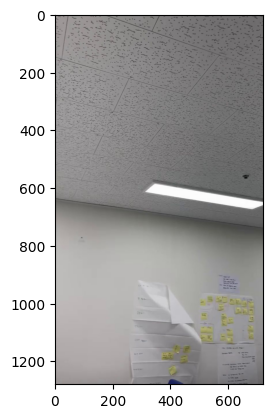

In [7]:
# import random
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

sample = random.choice(light_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [8]:
sample = random.choice(light_names)
image = mpimg.imread(path+ sample)
image.shape

(1280, 720, 3)

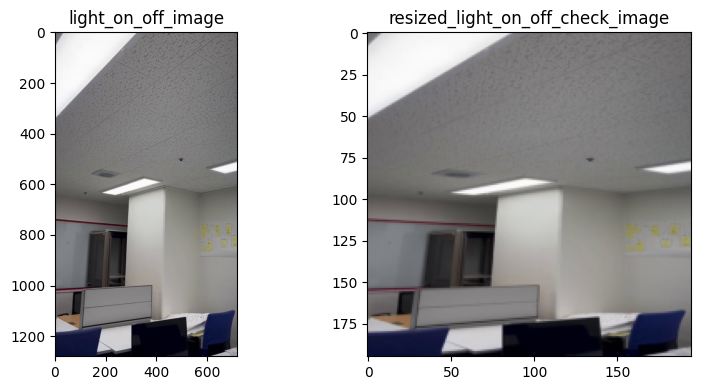

In [9]:
from skimage.transform import resize
resized = resize(image, (195, 195, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("light_on_off_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_light_on_off_check_image")

fig.tight_layout()
plt.show()

In [11]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(light_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (195, 195, 3)))

images = np.array(images)

  0%|          | 0/1789 [00:00<?, ?it/s]

In [12]:
images.shape, light_names[:5]

((1789, 195, 195, 3),
 ['lightOFF.240.jpg',
  'lightOFF.530.jpg',
  'lightON.852.jpg',
  'lightOFF.80.jpg',
  'lightON.34.jpg'])

In [13]:
images[:3]

array([[[[0.62461688, 0.59324433, 0.5854012 ],
         [0.62297154, 0.59159899, 0.58375585],
         [0.60891871, 0.57754616, 0.56970302],
         ...,
         [0.6739178 , 0.65413027, 0.64059657],
         [0.61964818, 0.59986065, 0.58632695],
         [0.5942296 , 0.57444207, 0.56090837]],

        [[0.62104748, 0.58967493, 0.58183179],
         [0.61815379, 0.58678125, 0.57893811],
         [0.57758782, 0.54621527, 0.53837213],
         ...,
         [0.58278015, 0.56051637, 0.5574559 ],
         [0.57505217, 0.55278838, 0.54972791],
         [0.57717157, 0.5549078 , 0.55184733]],

        [[0.62229123, 0.59091868, 0.58307554],
         [0.6233262 , 0.59195365, 0.58411052],
         [0.61401388, 0.58264133, 0.5747982 ],
         ...,
         [0.57345414, 0.55866665, 0.56057826],
         [0.57374677, 0.55895917, 0.5608708 ],
         [0.57508246, 0.56029502, 0.56220661]],

        ...,

        [[0.58708319, 0.54511095, 0.52218095],
         [0.57794097, 0.54072349, 0.53584299]

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(on_off_labels)
light_on_off_labels_encoded = encoder.transform(on_off_labels)
light_on_off_labels_encoded[:3], encoder.classes_

(array([0, 0, 1]), array(['lightOFF', 'lightON'], dtype='<U8'))

In [15]:
# 1.12 데이터 나누고

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =\
                train_test_split(images, light_on_off_labels_encoded, test_size =0.2,
                                 random_state = 13, stratify  = light_on_off_labels_encoded)
X_train.shape, X_test.shape

((1431, 195, 195, 3), (358, 195, 195, 3))

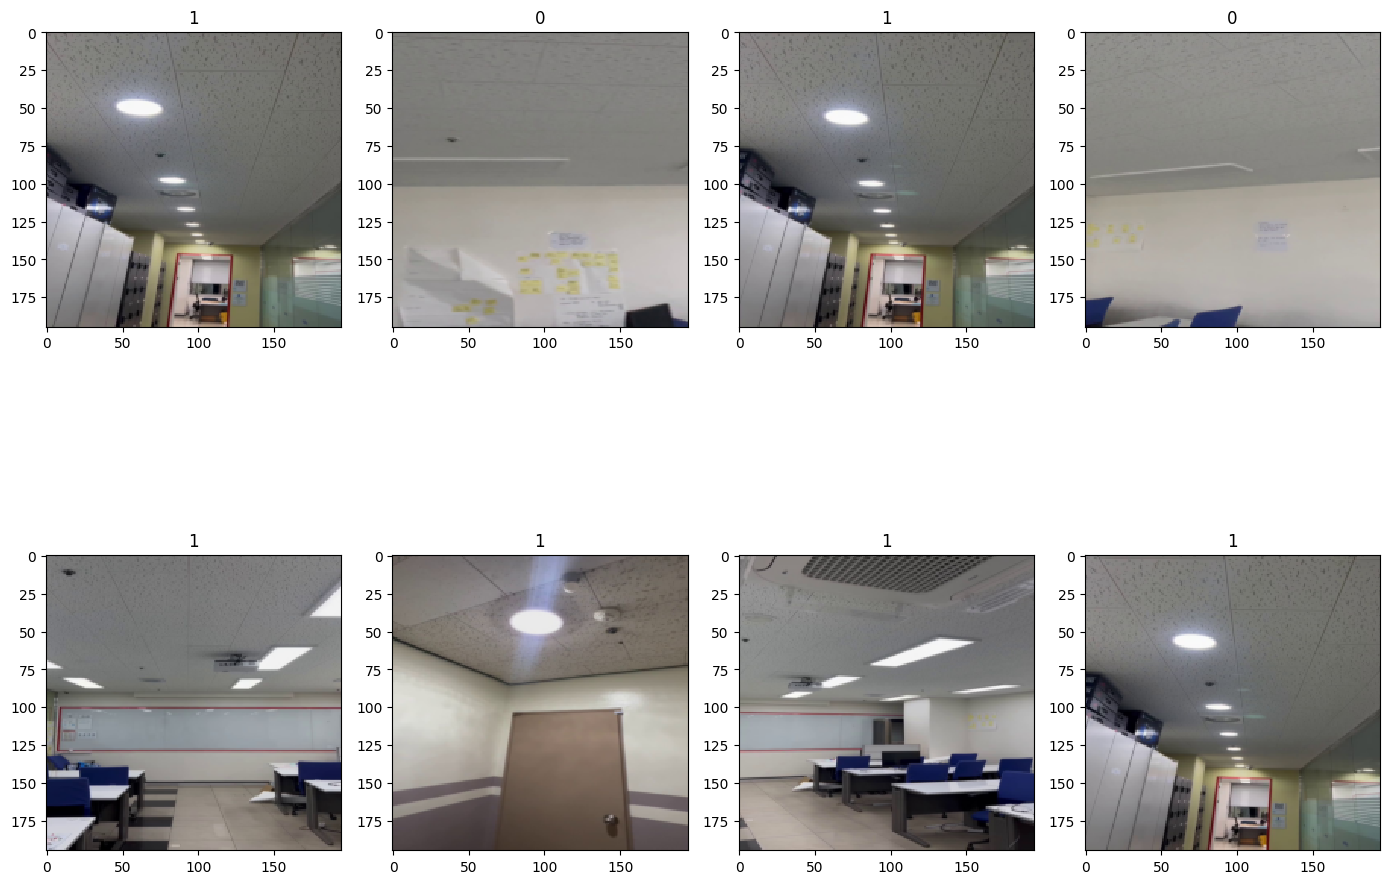

In [17]:
samples = random.choices(population = range(0, 244), k =8 )

plt.figure(figsize =(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap ='Greys',interpolation = 'nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential([layers.Conv2D(32,(3,3), activation ='relu', input_shape=(195,195,3)),
                           layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
                           layers.Dropout(0.25),
                           
                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),
                           
                           layers.Flatten(),
                           layers.Dense(512, activation ='relu'),
                           layers.Dropout(0.25),
                           layers.Dense(2, activation ='softmax')])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 193, 193, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 96, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 96, 96, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

2023-11-17 15:56:04.640057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 15:56:04.640351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 15:56:04.640581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(1431, 195, 195, 3), y_train,
                 epochs = 15, verbose =1, #처음 5번
                 validation_data = (X_test.reshape(358, 195, 195, 3), y_test))
print("fit time :", time.time() - start_time)

2023-11-17 15:56:09.945554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 652965300 exceeds 10% of free system memory.
2023-11-17 15:56:10.300357: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 652965300 exceeds 10% of free system memory.


Epoch 1/15


2023-11-17 15:56:11.184770: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-17 15:56:12.681578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-17 15:56:15.620763: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd3749aaa80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-17 15:56:15.620787: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-17 15:56:15.626878: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-17 15:56:15.707004: I ./tensorflow/compiler/jit/device_compiler.h:186] Comp

45/45 [==============================] - 11s 100ms/step - loss: 1.0221 - accuracy: 0.6073 - val_loss: 0.5447 - val_accuracy: 0.7486
Epoch 2/15
45/45 [==============================] - 3s 68ms/step - loss: 0.3479 - accuracy: 0.8728 - val_loss: 0.2385 - val_accuracy: 0.9218
Epoch 3/15
45/45 [==============================] - 3s 68ms/step - loss: 0.1361 - accuracy: 0.9532 - val_loss: 0.0806 - val_accuracy: 0.9637
Epoch 4/15
45/45 [==============================] - 3s 68ms/step - loss: 0.0293 - accuracy: 0.9937 - val_loss: 0.3214 - val_accuracy: 0.8827
Epoch 5/15
45/45 [==============================] - 3s 68ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6/15
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7/15
45/45 [==============================] - 3s 68ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 0.9944
Epoch 8/15
45/45 [====

In [21]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

12/12 [==============================] - 0s 13ms/step - loss: 1.8107e-04 - accuracy: 1.0000
Test loss : 0.0001810747926356271
Test accuracy : 1.0


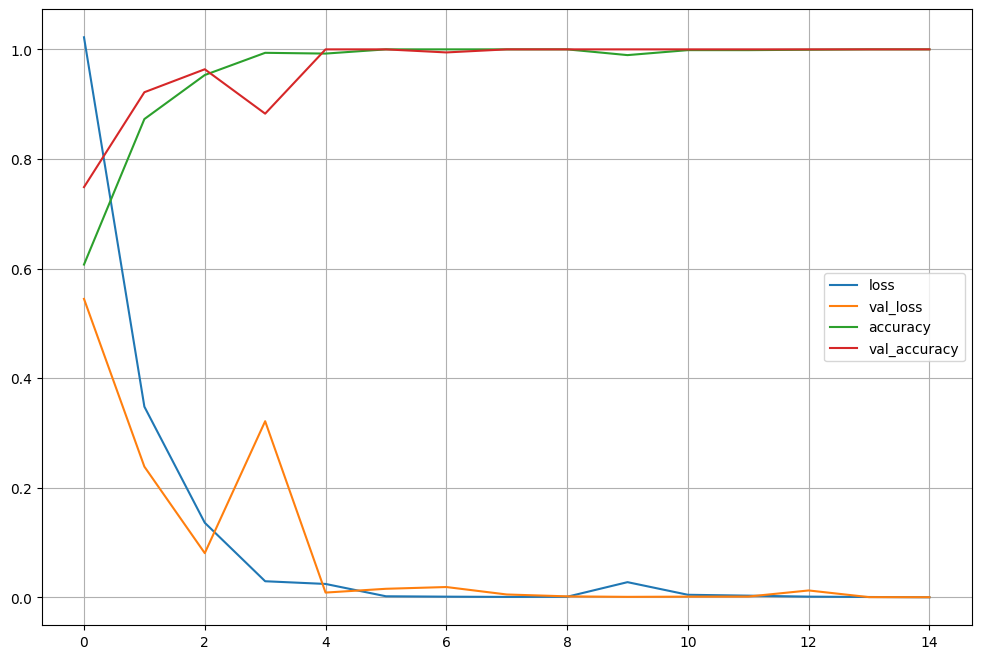

In [22]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.8.0


In [ ]:
!pip install --upgrade matplotlib

In [23]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

12/12 [==============================] - 0s 12ms/step


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [24]:
wrong_result =[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

0

In [25]:
plt.figure(figsize =(14,12))

for idx, n in enumerate(wrong_result):
    plt.subplot(1, 4, idx +1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n])+ ' Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()
    

<Figure size 1400x1200 with 0 Axes>

: 